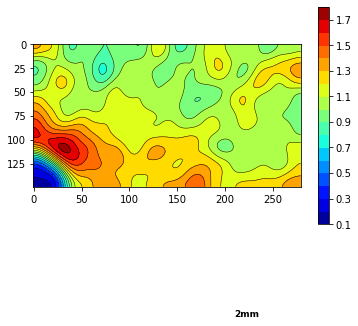

In [53]:
import DIC.DIC as dic
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = r'E:\experiment data\aluminum\2021-04-12\10501600mix_cts_Analysis'
save_path = r'E:\experiment data\aluminum\2021-04-12\10501600mix_cts_Analysis\output'
# dic.make_mask(path)
image = dic.load_file(path,flip='')


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Material property
n_hardening=17
yeild_strenth=535.435
poisson_ratio=0
alpha=0.585
In=2.78
youngs_modulus=71.7*1000

# Img parameter
set_angle = 60
down_level, up_level = 10,13
ratio = 2/60
left, right, up, down = 30,250,150, 0

crack_tip = [[269,233],[0,0],[0,0],[0,0],[0,0],[253,212],[0,0]] # y, x


i = 0 ##ref
j = 5##cur

cur = list(image.keys())[j]

src_reference = image[list(image.keys())[0]][:,:,1][crack_tip[i][0]-up:crack_tip[i][0]+down,crack_tip[i][1]-left:crack_tip[i][1]+right]
src_current = image[cur][:,:,1][crack_tip[j][0]-up:crack_tip[j][0]+down,crack_tip[j][1]-left:crack_tip[j][1]+right]



dst = cv2.subtract(src_current,src_reference)
dst = dst.astype(float)
dst = np.where(dst>5, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),10)
gas[270:272,200:260] = 0


plt.imshow(src_current, cmap='gray')
# plt.axis('off')
csf = plt.contourf(gas, 15, cmap = 'jet')
CS = plt.contour(gas, 15, colors='black', linewidths = 0.5)

plt.colorbar(csf)
plt.text( 210,285, '2mm', fontsize=9, fontweight='bold')

plt.savefig(save_path+'/%s.png'%str(j))